# Projet final : House price 
### *Par Aouatif BOZAZ*

## 1. Lecture du data : 

** Pour commencer le traitement de la base données, on a besoin d'importer les librairies qu'on utilisera par la suite, ainsi d'uploader dataframes train et test du site kaggle sous les noms : 'df' et 'df_valid'. ** 

In [1]:
#Importation des librairies :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from IPython.display import Image
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV


In [2]:
#Importer data train : 
df = pd.read_csv ("C:/Users/aouatif.bozaz/Downloads/train.csv", sep=',')

In [3]:
#Importer data test de la validation des modèles: 
df_Valid = pd.read_csv ("C:/Users/aouatif.bozaz/Downloads/test.csv", sep=',')

In [4]:
#Information sur dataframes : 
df.shape

(1460, 81)

In [5]:
df_Valid.shape

(1459, 80)

** *On a sur train 81 variables dont 'SalePrice' est la variable à prédire, et qui est la variable supprimé du dataframe df_Valid. Sur train on a 1460 observations. * **

** *Maintenant, on a besoin d'analyser les variables et les observations pour détecter les valeurs manquantes et aberrantes. On commence par les variables nuériques : remplacer les valeurs nulles par la moyenne de la variable. Ensuite, les variables catégoriques : il faut les encoder pour les intégrer dans les modèles qu'on proposera.* **  

## 2. Clean dataframes : 

In [6]:
df.isnull().sum().sort_values(ascending=False).head(20)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

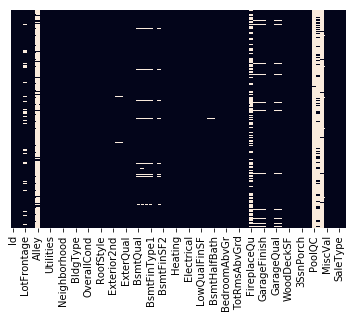

In [7]:
#Ploter les variables ayant des valeurs manquantes sur dataframe de validation : 
sns.heatmap(df_Valid.isnull(), yticklabels = False, cbar= False)

** On constate que les variables suivantes: Alley, PoolArea, Fence, MiscFeature et FireplaceQu contiennent un grand nombre de valeurs manquantes, or si on analyse la varible, les lignes avec NA donne une information sur la disponibilté de la variable; par exemple, NA dans la colonne de la variable 'alley' désigne que il n'y a pas d'accès par ruelle à la maison, qui demeure une information très importante pour la décision du prix d'une maison. 
<br/> Donc on va remplacer les na par 'Other', les int par zéro et les variables de type float par la moyenne de la variable, comme suit : **

In [8]:
#Regrouper les colonnes de type object : 
categ_columns = [col for col in df.columns if df[col].dtype == 'O']

In [9]:
#Regrouper les colonnes de type Int64 : 
int_columns = [col for col in df.columns if df[col].dtype == 'int64']
#Enlever saleprice : 
int_columns = int_columns[:-1] 

In [10]:
#Idem pour dtype float :
flt_columns = [col for col in df.columns if df[col].dtype == 'float64']

In [11]:
#On remplace les valeurs na par 0 :
for col in int_columns:
    df[col].fillna(0, inplace = True)
    df_Valid[col].fillna(0, inplace = True)

In [12]:
#Remplacer toutes les valeurs nulles/vides par la valeur 'Other':
for col in categ_columns:
    df[col].fillna('Other', inplace = True)
    df_Valid[col].fillna('Other', inplace = True)

In [13]:
#On remplace les valeurs float par la moyenne de la variable:
for col in flt_columns:
    df[col].fillna(np.mean(df[col]), inplace = True)
    df_Valid[col].fillna(np.mean(df_Valid[col]), inplace = True)

In [14]:
#concat deux variables : 
df_total = pd.concat([df, df_Valid])

In [15]:
#La normalisation des floats : 
for col in flt_columns:
    df[col] = df[col] / np.max(df_total[col])
    df_Valid[col] = df_Valid[col] / np.max(df_total[col])

**On plot deux graphes pour vérifier si on a plus de valeurs manquantes. ** 

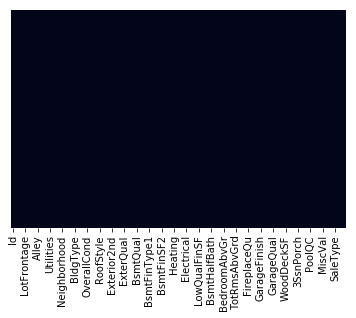

In [16]:
#Vérification de la suppression, remplacement des valeurs manquantes et aberrantes sur df:
sns.heatmap(df.isnull(), yticklabels = False, cbar= False)

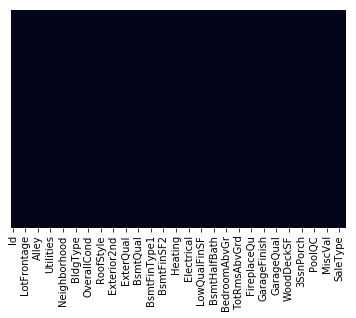

In [17]:
#Vérification de la suppression, remplacement des valeurs manquantes et aberrantes:
sns.heatmap(df_Valid.isnull(), yticklabels = False, cbar= False)

**D'après les deux figures, on est assuré qu'on a supprimé toutes les valeurs manquantes. On peut maintenant commencer l'analyse des données comme étant 2ème étape. **

## 2.Analyse du data : 

** On commence par une visualisation de la variable à prédire en fonction des autres variables :**

In [18]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**  *La moyenn des prix des maisons est de l'ordre de 180921 dollar. La majorité des prix sont entre : 129975  et 214000 dollar .* **

** Nous traçons ensuite l'histogramme de distribution de la variable 'SalePrice', et le graphe de la loi normale. **

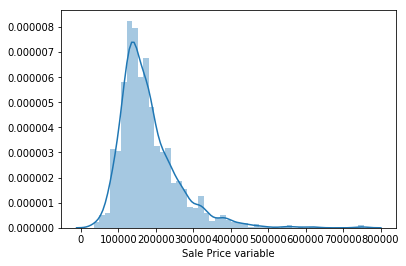

In [19]:
x = pd.Series(df['SalePrice'], name="Sale Price variable")
ax = sns.distplot(x)

**Le graphique montre que la distribution de SalePrice s'écarte de la distribution normale, qu'elle a une valeur maximale et qu'elle est biaisée positivement, on traçera l'histograme de log ( 'SalePrice' ). 
Mais il ne suit pas la ligne diagonale (en-dessous à droite), la ligne diagonale représente la distribution normale dans le graphique de probabilité normale, et une bonne distribution des données doit suivre cette ligne de près**

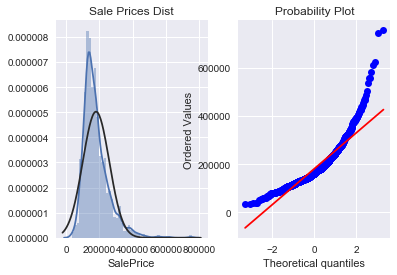

Skewness: 1.882876
Kurtosis: 6.536282


In [20]:
from scipy import stats
import seaborn as sns
sns.set()
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Sale Prices Dist")
sns.distplot(df['SalePrice'], fit=stats.norm)
plt.subplot(1, 2, 2)
stats.probplot(df['SalePrice'], plot=plt)
plt.show()
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

** Afin de résoudre cette problématique, on va tenter la trasformation logarithmique de la variable target : **

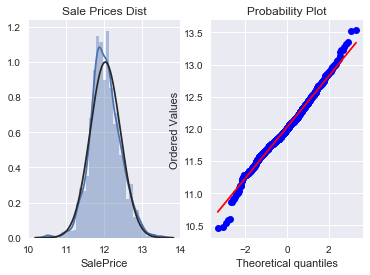

Skewness: 0.121335
Kurtosis: 0.809532


In [21]:
target = np.log(df['SalePrice'])
sns.set()
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Sale Prices Dist")
sns.distplot(target, fit=stats.norm)
plt.subplot(1, 2, 2)
stats.probplot(target, plot=plt)
plt.show()
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

** Le graphique ci-dessus, il est évident que la distribution des données suit mieux la ligne diagonale que la précédente, bien qu'il existe des valeurs aberrantes (outliers), il semble donc que la transformation du log est un bon choix pour transformer les données.**


** On passe maintenat à l'étude de corrélation entre les variables numériques: **

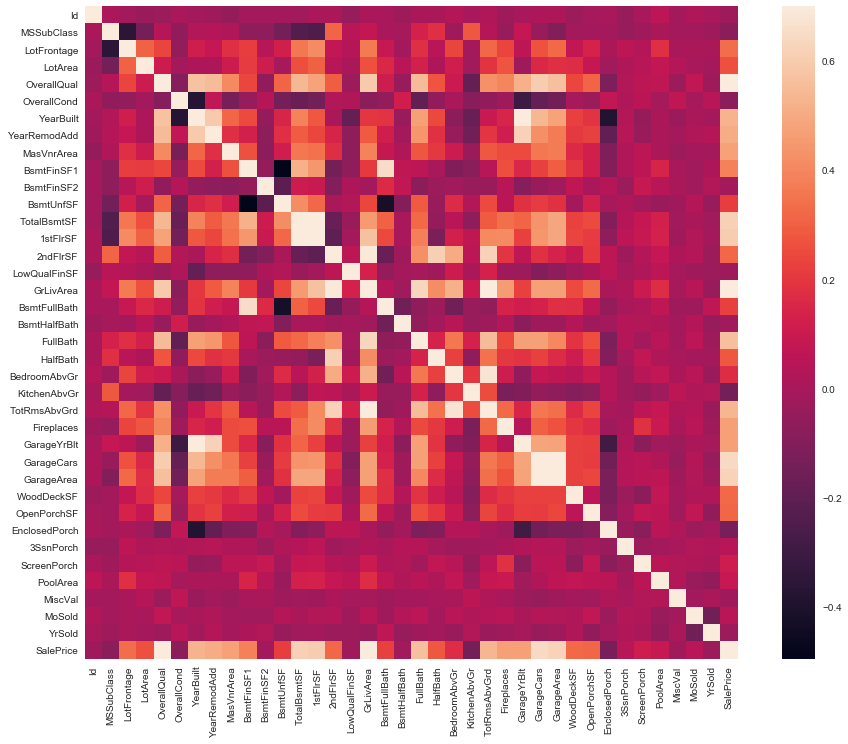

In [22]:
# Matrice de corrélation :
corr = df.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr, vmax=0.7, square=True)

** *On peut pas déterminer facilement les variables corrélées avec notre variable à prédire, on a besoin de zoomer sur la variable 'SalePrice'. *  **

In [23]:
var_corr = corr['SalePrice'].sort_values(ascending=False)
#on examine la corrélation de la variable 'SalePrice' avec les variables avec une corrélation plus de la valeur absolue de 0.5.
var_corr = var_corr[abs(var_corr) >= 0.5]
var_corr = var_corr[var_corr.index != 'SalePrice']
var_corr

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

** *On a donc un classement décroissant des variables numériques ayant coef de corrélation plus de 0.5, dont la variable 'OverallQual' est au top de la liste. Mais comment elle est la corrélation entre les deux variables? * **

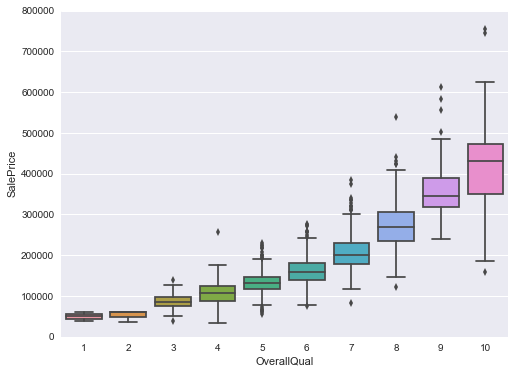

In [24]:
#On plot la variable 'SalePrice' en fonction 'OverallQual'
overall_qual = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
sns.set()
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=overall_qual)
fig.axis(ymin=0, ymax=800000)
plt.show()

** *Le prix de la maison augmente avec la variable catégorielle 'OverallQual' qui Évalue le matériel global et la finition de la maison, où le nombre 10 désigne 'Très excellent' et 1 : 'Very Poor'.
<br/>Regardons maintenenant les autres corrélation (des variables résultats de matrice de corrélation) avec 'SalePrice' . * **

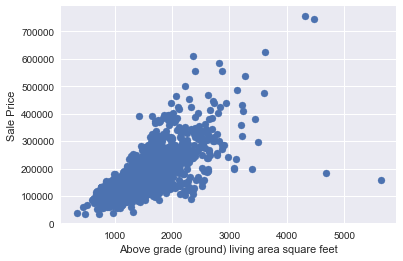

In [25]:
#Corr avec GrLivArea: 
plt.scatter(x=df['GrLivArea'], y=df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

** D'après le plot, on dire qu' à première vue, on voit que l’augmentation de la surface habitable correspond à l’augmentation du prix.**

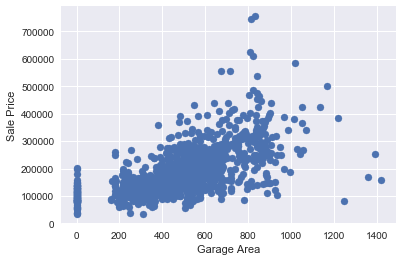

In [26]:
#Corr avec GarageArea: 
plt.scatter(x=df['GarageArea'], y=df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

** le plot visualise la superficie du garage. On doit tenir en compte que les garages de superficie zéro c'est les valeurs qu'on remplacer par zéro, ie , une maison sans garage. On constate aussi que l'existence des outliers: des valeur aberrante  influencent certains paramètres statistiques, comme la moyenne. Cela peut fausser notre compréhension du jeu de données et nous conduire à émettre des hypothèses erronées sur ce dernier. Pour avoir des modèles de prédiction qui fonctionne mieux on a besoin de supprimer ces outliers. 
<br/>Vu que la variable nous interesse plus -elle est corrélée avec 'GarageCars' qu'on va garder- on peut ne pas suprimer les outliers.  **

** On trace de nouveau le plot du 'SalePrice' en fonction du 'GarageArea' :** 

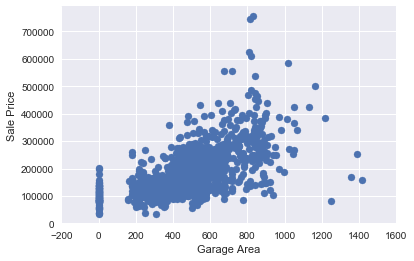

In [27]:
plt.scatter(x=df['GarageArea'], y=df['SalePrice'])
#On force par la suivante xlimite pour avoir les mêmes conditions :
plt.xlim(-200,1600) 
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

** Voici le plot des variables 'intéressantes':  ** 

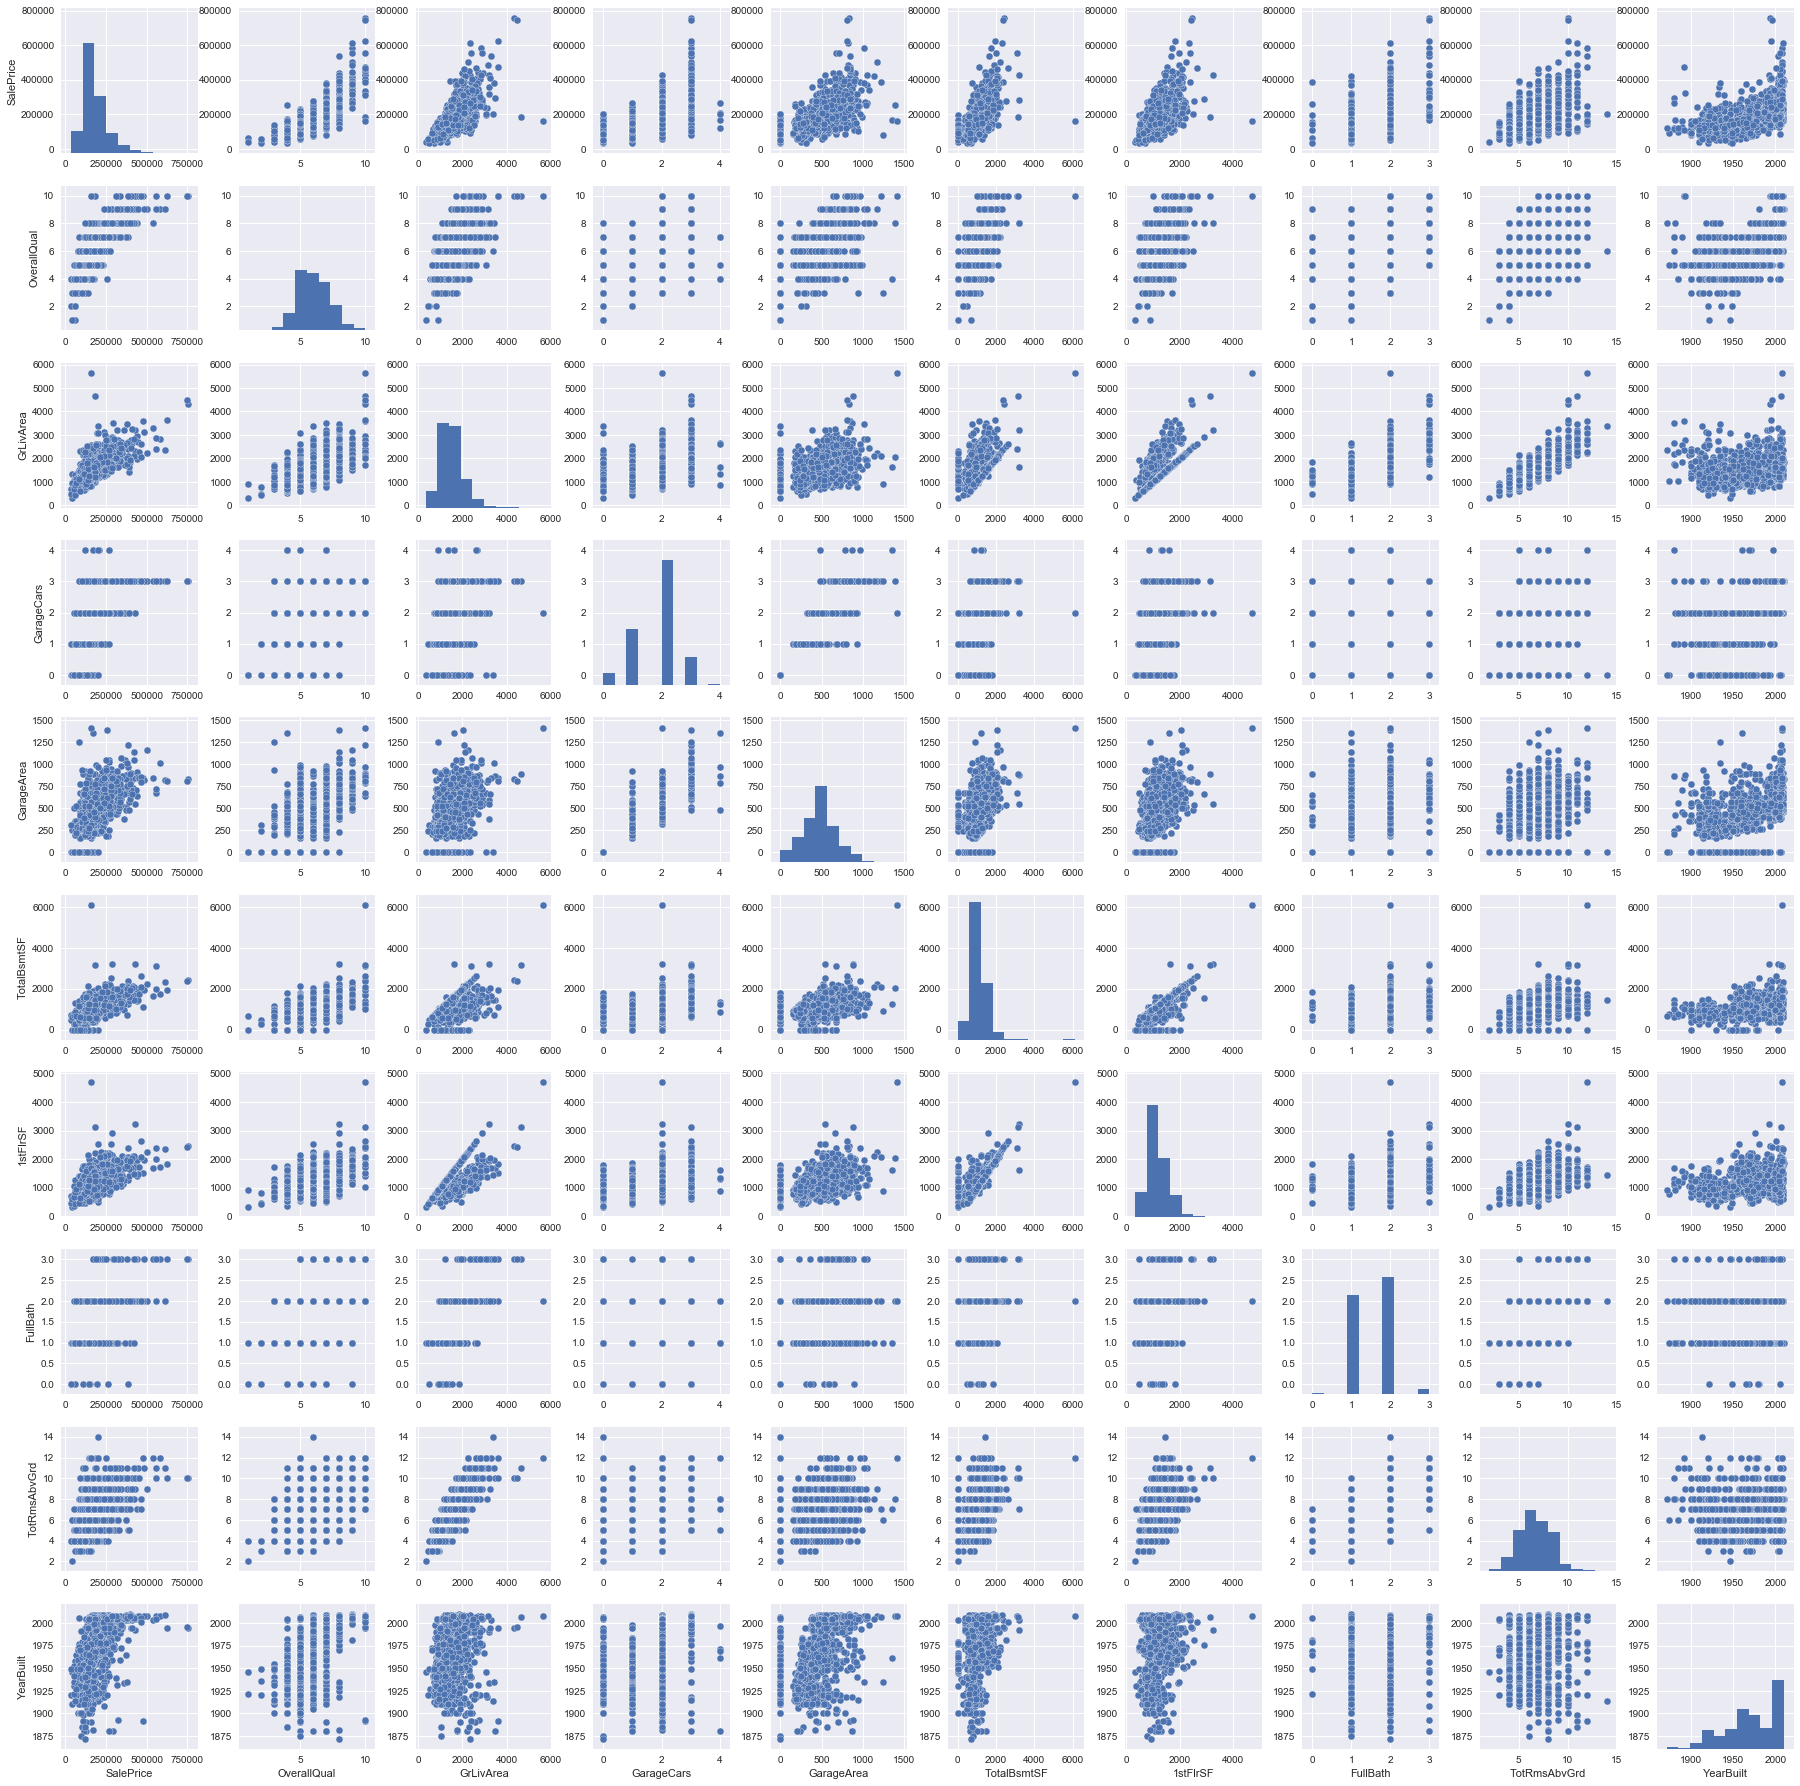

In [28]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(df[cols], size=2.5)
plt.show()

**Visualisons la corrélationn entre les variables dites intéressantes : ** 

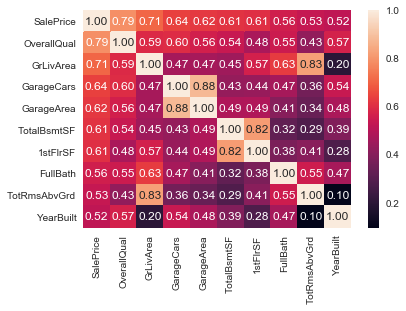

In [29]:
X =df [['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']]
sns.heatmap(X.corr(), annot=True, fmt=".2f")
plt.show()

** Analyse de la corrélation: **
* **OverallQual et GrLivArea ont une forte corrélation avec SalePrice.**
* **De plus, Yearbuild et Fullbath ne sont pas très corrélées à la variable target.** 
* **On constate une forte corrélation entre GrLivArea et TotRmsAbvGrd. La corrélation est d'ordre de 80% . **
* **GarageCars et GarageArea ont nt non seulement une forte corrélation avec SalePrice, mais également une forte corrélation entre eux. Il est facile d’imaginer que le nombre de voitures stockées dans le garage dépend du secteur de garage, ce qui signifie qu’un d’entre elles suffit à représenter la relation entre SalePrice et Garage. Dans ce cas, nous choisissons GarageCars, a un score légèrement supérieur (en se basant sur la corrélation avec SalePrice ).**
* **De même pour les deux variables: TotalBsmtSF et 1stFlrSF. Donc on peut se contenter d'une d'entre eux. **


**On va enlever donc la variable GarageArea, yearbuil et fullbath. **
<br/>
<br/>** Sachant que, la variable TotalBsmtSF (Total square feet of basement area) est la somme de trois autres variables BsmtFinSF1, BsmtFinSF2 et BsmtUnfSF, on peut facilement supprimer les trois autres, vu que TotalBsmtSF les représente dans le modèle.  **
<br/>
<br/> **Reste à décider si on garde TotalBsmtSF ou 1stFlrSF, vu que leur coef de corrélation est similaire. **

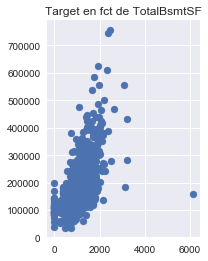

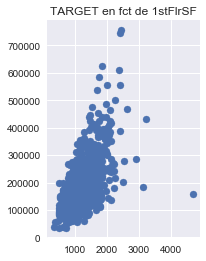

In [30]:
sns.set()
plt.figure(1)
plt.subplot(1, 2, 1)
plt.scatter(x=df['TotalBsmtSF'], y=df['SalePrice'])
plt.title("Target en fct de TotalBsmtSF")
plt.show()

plt.subplot(1, 2, 2)
plt.scatter(x=df['1stFlrSF'], y=df['SalePrice'])
plt.title("TARGET en fct de 1stFlrSF")
plt.show()



** Depuis les deux graphes, on peut dire ques les deux variables sont plus ou moins similaire sauf en zéro pour TotalBsmtSF où TotalBsmtSF n'ifluence pas la variable target. ** 
<br/> ** Traçons celui de targer en fonction 2ndFlrSF pour voir si cette dernière suit le même graphe et contient des indormations similairs. **

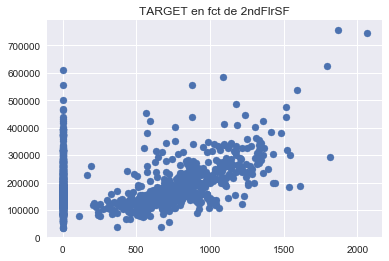

In [31]:
plt.subplot(1, 1, 1)
plt.scatter(x=df['2ndFlrSF'], y=df['SalePrice'])
plt.title("TARGET en fct de 2ndFlrSF")
plt.show()

**Le graphe suit le rythme des autres deux graphes, avec un grand nombre de valeurs nulles plus que ce que représente la variable TotalBsmtSF. 
<br/> On va donc créer une nouvelle variable nommée 'totalSF' qui est la somme des trois variables: 2ndFlrSF, TotalBsmtSF et 1stFlrSF. Donc toute information est enregistré dans la nouvelle variable et on peut après les supprimer.  **

In [32]:
#Supression des trois variables discuté auparavant: 
df.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)
#L'ajout de la nouvelle variable sur df: 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)
#Supression de la variable 'GarageArea': 
df.drop(['GarageArea'], axis=1, inplace=True)

In [33]:
#Supression des trois variables discuté auparavant: 
df_Valid.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)
#L'ajout de la nouvelle variable sur df: 
df_Valid['TotalSF'] = df_Valid['TotalBsmtSF'] + df_Valid['1stFlrSF'] + df_Valid['2ndFlrSF']
df_Valid.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)
#Supression de la variable 'GarageArea' du dataframe validation : 
df_Valid.drop(['GarageArea'], axis=1, inplace=True)

**Traçons l'évolution de 'SalePrice' en fonction de la nouvelle variable TotalSF : **

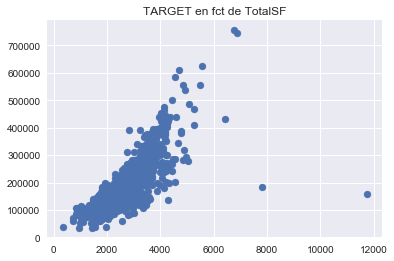

In [34]:
plt.subplot(1, 1, 1)
plt.scatter(x=df['TotalSF'], y=df['SalePrice'])
plt.title("TARGET en fct de TotalSF")
plt.show()

In [35]:
#Corrélation entre deux variables : TotalSF et SalePrice: 
df[['SalePrice', 'TotalSF']].corr()

,SalePrice,TotalSF
SalePrice,1.00000,0.78226
TotalSF,0.78226,1.00000


**Le graphe suit mieux une distribution exponentielle que les deux trois autres graphes ploter auparavant, mais il existe encore deux outliers (valeurs aberrante) qu'on peut supprimer par la suite . 
<br/> la corrélation avec target est la plus grande des coef de corrélation, elle dépasse normalement 'OverallQual'. **


* **On va ploter la distribution de la variable TotalSF et la ligne droite de loi normale comme on a déja fait pour SalePrice. **

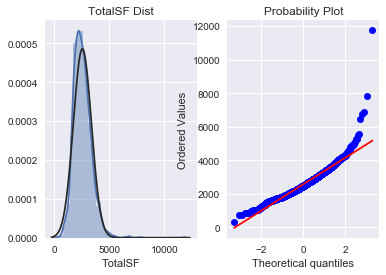

Skewness: 1.776700
Kurtosis: 12.621968


In [36]:
from scipy import stats
import seaborn as sns
sns.set()
plt.figure()
plt.subplot(1, 2, 1)
plt.title("TotalSF Dist")
sns.distplot(df['TotalSF'], fit=stats.norm)
plt.subplot(1, 2, 2)
stats.probplot(df['TotalSF'], plot=plt)
plt.show()
print("Skewness: %f" % df['TotalSF'].skew())
print("Kurtosis: %f" % df['TotalSF'].kurt())

* **Maintenant, on essaie avec le log de la variable : ** 

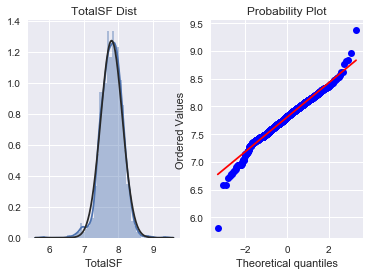

Skewness: -0.349582
Kurtosis: 1.990357


In [37]:
Target = np.log(df['TotalSF'])
sns.set()
plt.figure()
plt.subplot(1, 2, 1)
plt.title("TotalSF Dist")
sns.distplot(Target, fit=stats.norm)
plt.subplot(1, 2, 2)
stats.probplot(Target, plot=plt)
plt.show()
print("Skewness: %f" % Target.skew())
print("Kurtosis: %f" % Target.kurt())

**La transformé log de la variable donne des résultats mieux que la variables, et elle suit mieux la loi normale. 
<br/> On peut traçer la courbe de log('SalePrice') en fonction de log('TotalSF').**

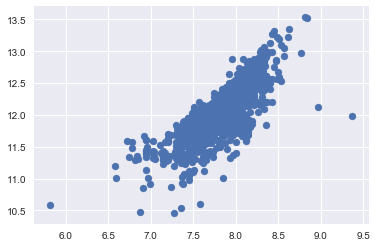

In [38]:
sns.set()
sf = np.log(df['TotalSF'])
sp = np.log(df['SalePrice'])
plt.scatter(sf[sf > 0], sp[sf > 0])
plt.show()

** On va supprimer toutes les variables en relations avec garages et on gardera que 'GarageCars' qui était corrélé avec la variable target. **

In [39]:
#Supression sur df et df_Valid
df.drop(['GarageType', 'GarageYrBlt', 'GarageFinish','GarageQual', 'GarageCond'], axis=1, inplace=True)
df_Valid.drop(['GarageType', 'GarageYrBlt', 'GarageFinish','GarageQual', 'GarageCond'], axis=1, inplace=True)

* **On va faire de même pour le groupe du basement, on gardera TotalSF puisque elle contient TotalBsmtSF. ** 

In [40]:
#Supression sur df et df_Valid
df.drop(['BsmtHalfBath', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath'], axis=1, inplace=True)
df_Valid.drop(['BsmtHalfBath', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath'], axis=1, inplace=True)

** On fait un tour sur toutes les variables, et on va suprimer celles qui apparaissent moins importantes ou moins corrélées avec variable target. **

In [41]:
df.drop(['Utilities', 'Fence', 'MiscFeature', 'MiscVal', 'WoodDeckSF', 'Heating', 'LowQualFinSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolQC'], axis=1, inplace=True)
df_Valid.drop(['Utilities', 'Fence', 'MiscFeature', 'MiscVal', 'WoodDeckSF', 'Heating', 'LowQualFinSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolQC'], axis=1, inplace=True)

### Variables catégorielles : 

* **Començons par une visualisation des variables non numériques : **

In [42]:
categoricals = df.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,3,4,4,5,3,25,9,8,...,6,5,2,6,4,7,6,3,9,6
top,RL,Pave,Other,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,...,PConc,Ex,Y,SBrkr,TA,Typ,Other,Y,WD,Normal
freq,1151,1454,1369,925,1311,1052,1382,225,1260,1445,...,647,741,1365,1334,735,1360,690,1340,1267,1198


** On a une visualisation de toutes les variables non-numériques, avec la fonction TOP nous donne la valeur dominante avec sa fréquence d'apparition dans le dataframe. ** 

* ** Afin d'encoder les variables catégorielles, on va ploter les variables et la moyenne 'SalePrice'. Si une catégorie est dominante, on va encoder d'une manière zéro et un (on le verra par la suite). Sinon on va proceder par one hot encoding ou labelEncoder selon la variable et son importance. ** 

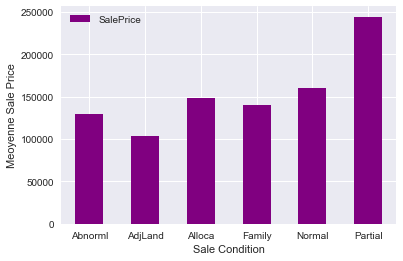

In [43]:
#Définition de la condition (on peut utiliser group by aussi):
condition_pivot = df.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='purple')
plt.xlabel('Sale Condition')
plt.ylabel('Meoyenne Sale Price')
plt.xticks(rotation=0)
plt.show()

** On constate que la catégorie 'Partial' -qui signifie que la maison n'a pas été terminée lors de la dernière évaluation- a une grande moyenne (qui demeure signifiante) avec SalePrice. On va donc encoder SaleCondition suivant la catégorie 'Partial': on donne 1 si Salecondition est en catégorie 'Partial' et zéro sinon, en exécutant la commande suivante: **

In [44]:
def encode(x): return 1 if x == 'Partial' else 0
df['enc_condition'] = df.SaleCondition.apply(encode)
df_Valid['enc_condition'] = df_Valid.SaleCondition.apply(encode)
del df['SaleCondition']
del df_Valid['SaleCondition']

** On traçera le plot de cette nouvelle variable encodé: **

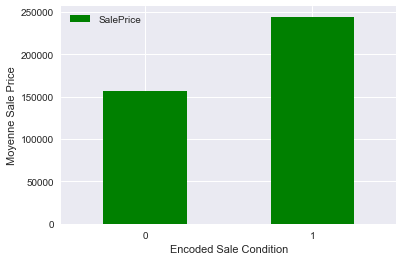

In [45]:
condition_pivot = df.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='green')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Moyenne Sale Price')
plt.xticks(rotation=0)
plt.show()

**On va essayer de faire de même pour d'autres variables catégorielles. **

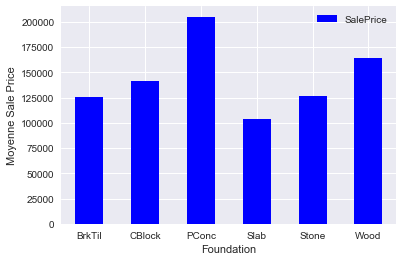

In [46]:
cond = df.pivot_table(index='Foundation',
                                    values='SalePrice', aggfunc=np.median)
cond.plot(kind='bar', color='blue')
plt.xlabel('Foundation')
plt.ylabel('Moyenne Sale Price')
plt.xticks(rotation=0)
plt.show()

**Ici aussi on a la domination de la catégorie PConc, donc on va donner 'HouseStyle' 1 si la catégorie est PConc, et zéro sinon. **

In [47]:
def encod(x): return 1 if x == 'PConc' else 0
df['enc_foundation'] = df.Foundation.apply(encod)
df_Valid['enc_foundation'] = df_Valid.Foundation.apply(encod)
del df['Foundation']
del df_Valid['Foundation']

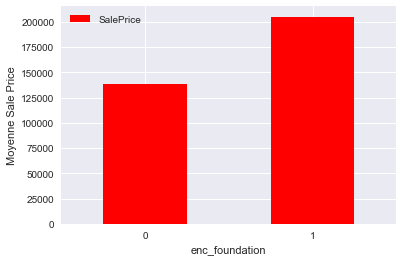

In [48]:
cond = df.pivot_table(index='enc_foundation',
                                    values='SalePrice', aggfunc=np.median)
cond.plot(kind='bar', color='red')
plt.xlabel('enc_foundation')
plt.ylabel('Moyenne Sale Price')
plt.xticks(rotation=0)
plt.show()

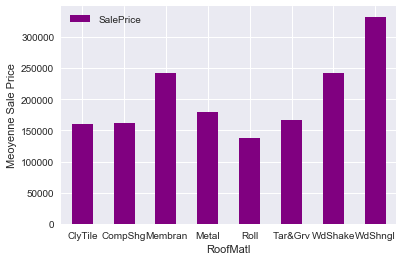

In [49]:
plt.figure(figsize=(100,100))
conditio_pivot = df.pivot_table(index='RoofMatl',
                                    values='SalePrice', aggfunc=np.median)
conditio_pivot.plot(kind='bar', color='purple')
plt.xlabel('RoofMatl')
plt.ylabel('Meoyenne Sale Price')
plt.xticks(rotation=0)
plt.show()

In [50]:
def encodeur(x): return 1 if x == 'WdShngl' else 0
df['enc_RoofMatl'] = df.RoofMatl.apply(encodeur)
df_Valid['enc_RoofMatl'] = df_Valid.RoofMatl.apply(encodeur)
del df['RoofMatl']
del df_Valid['RoofMatl']

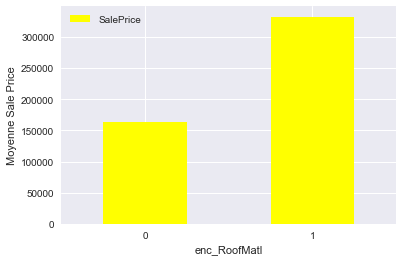

In [51]:
cd = df.pivot_table(index='enc_RoofMatl',
                                    values='SalePrice', aggfunc=np.median)
cd.plot(kind='bar', color='yellow')
plt.xlabel('enc_RoofMatl')
plt.ylabel('Moyenne Sale Price')
plt.xticks(rotation=0)
plt.show()

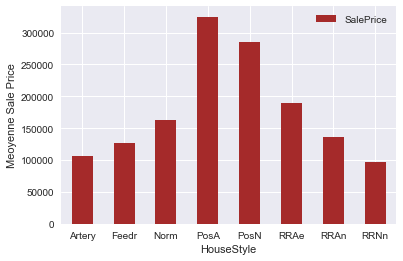

In [52]:

conditio_pivot = df.pivot_table(index='Condition2',
                                    values='SalePrice', aggfunc=np.median)
conditio_pivot.plot(kind='bar', color='brown')
plt.xlabel('HouseStyle')
plt.ylabel('Meoyenne Sale Price')
plt.xticks(rotation=0)
plt.show()

In [53]:
def encodeur(x): return 1 if x == 'PosA' else 0
df['enc_Condition2'] = df.Condition2.apply(encodeur)
df_Valid['enc_Condition2'] = df_Valid.Condition2.apply(encodeur)
del df['Condition2']
del df_Valid['Condition2']

In [54]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'HeatingQC', 'CentralAir', 'Electrical', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageCars',
       'PavedDrive', 'PoolArea', 'MoSold', 'YrSold', 'SaleType', 'SalePrice',
       'TotalSF', 'enc_condition', 'enc_foundation', 'enc_RoofMatl',
       'enc_Condition2'],
      dtype='object')

* ** On va créer une nouvelle variable 'age' de la maison, vu que le prix est corrélé avec l'age; plus la maison est ancienne plus le prix diminue. et par la suite on peut supprimer deux variables: YearBuilt et YrSold. **


In [55]:
df['Age'] = df['YrSold'] - df['YearBuilt']
df= df.drop(['YrSold','YearBuilt'], axis =1)
df_Valid['Age']= df_Valid['YrSold'] - df_Valid['YearBuilt']
df_Valid= df_Valid.drop(['YrSold','YearBuilt'], axis =1)


In [56]:
#encoder dummies pour les variables de types 'O' : 
for col in df.dtypes[df.dtypes == 'object'].index:
    for_dummy = df.pop(col)
    df = pd.concat([df, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [57]:
#Idem pour df_Valid
for col in df_Valid.dtypes[df_Valid.dtypes == 'object'].index:
    for_dummy = df_Valid.pop(col)
    df_Valid = pd.concat([df_Valid, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [58]:
df.shape

(1460, 191)

In [59]:
df_Valid.shape

(1459, 190)

**On a passé de 81 à 191 variables, ceci est à cause de one hot encoding, pour cela on a tenter de faire la domination pour réduire les variables, car sinon nous aurions un peu près 250. ** 

## 3. Les modèles :


### 3.1 Linéaire regression : 

In [60]:
#Définiton des variables : 
y = np.log(df.SalePrice)
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalSF', 'enc_condition', 'enc_foundation', 'Condition1_Norm', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_RRNn', 'Condition1_RRAn', 'Condition1_PosN', 'Condition1_PosA', 'Condition1_RRNe', 'Alley_Grvl', 'Alley_Pave', 'Alley_Other', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'CentralAir_Y', 'Age']]

**Après la définition de la variable target y et les variables indépendantes X, on doit diviser dataframe en train et test. 
<br/> train_test_split () renvoie quatre objets: **
* **X_train est le sous-ensemble de nos fonctionnalités utilisées pour train des modèles.**
* **X_test est le sous-ensemble que nous utiliserons pour tester le modèle.**
* **y_train est la variable cible SalePrice qui correspond à X_train.**
* **y_test est la variable cible SalePrice qui correspond à X_test. **

In [61]:
#Split du data :  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

**Les étapes à suivre: **
* **Création du modèle : **
* **On commence par initiation du modèle. **
* **Ensuite, on fit le modèle par X_train et y_train. ** 
* **Evaluation de la performance. **
* **Visualisation des résultats. **

In [62]:
#Construction du modèle : 
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [63]:
#Calcul R² : 
print ("R² est: \n", model.score(X_test, y_test))

R² est: 
 0.86783650711


**Cela signifie que nos variables expliquent approximativement 86% de la variance de la variable target .
<br/> Calculons ensuite RMSE (root mean square error qui calcule la distance entre les vrais valeurs et les valeurs prédites), pour cela nous avons besoin d'appliquer le modèle sur test et le comparer avec les valeurs de y_test. **

In [64]:
#Calcul du RMSE : 
predictions = model.predict(X_test)
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.0246634943921


In [65]:
#Calcul du RMSE sur train: 
predict = model.predict(X_train)
print ('RMSE is: \n', mean_squared_error(y_train, predict))

RMSE is: 
 0.0258555923213


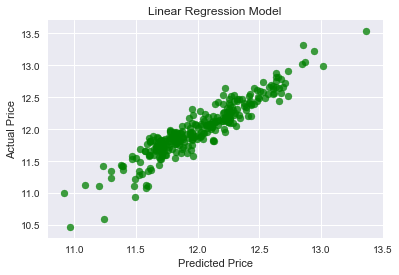

In [66]:
#Visualisation 
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='green') 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

** Le graphe n'est pas totalement une ligne droite, si la prédiction était meilleur on va voir une ligne droite y=x. 
<br/>**

In [67]:
#Validation sur kaggle:  
Xvalid = df_Valid[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalSF', 'enc_condition', 'enc_foundation', 'Condition1_Norm', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_RRNn', 'Condition1_RRAn', 'Condition1_PosN', 'Condition1_PosA', 'Condition1_RRNe', 'Alley_Grvl', 'Alley_Pave', 'Alley_Other', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'CentralAir_Y', 'Age']]
#Prédiction : 
y_vld = model.predict(Xvalid)
yfinal =np.exp(y_vld)



In [68]:
#Insertion: 
res = pd.DataFrame(columns = ['Id', 'SalePrice'])
res['Id'] = Xvalid.index + 1461
res['SalePrice'] = yfinal
res.to_csv("submission_e.csv", index = False)

* **Passons à d'autre modèles de prédiction. **

In [69]:
#Shuffle dataframe: 
df= df.sample(frac=1)
df_Valid = df_Valid.sample(frac=1)


** On va stocker la variable target dans une nouvelle feature : train_labels et on va travailler par log de cette variable. <br/> Donc notre X c'est df et target demeure train_labels.**

In [70]:
#Définition de la variable target : 
train_label = df.pop('SalePrice')

In [71]:
#Définition de log du target 
train_labels = np.log1p(train_label)

In [72]:
#Split du data : 
X_train, X_test, y_train, y_test = train_test_split(df, train_labels, random_state=42, test_size=0.2)

### 3.1 Lasso : 

In [73]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet, Lasso


In [74]:
Lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [75]:
Lasso.fit(X_train,y_train)
y_hat_train = Lasso.predict(X_train)
y_hat_test = Lasso.predict(X_test)
Train_score = np.sqrt(mean_squared_error(y_hat_train, y_train))
Test_score = np.sqrt(mean_squared_error(y_hat_test, y_test))
print ('le score sur train est {}'. format(Train_score))
print ('le score sur test est {}'. format(Test_score))
     

le score sur train est 0.12608009767676048
le score sur test est 0.14031009718856755


In [76]:
#prédiction sur validation : 
ypred_lasso= Lasso.predict(df_Valid)
y_lasso_final = np.exp(ypred_lasso) -1

In [78]:
sub = pd.DataFrame(columns = ['Id', 'SalePrice'])
sub['Id'] = df_Valid.index + 1461
sub['SalePrice'] = y_lasso_final 
sub.to_csv("Model_Lasso_01.csv", index = False)

Le score du modèle est sur kaggle 0.14095

### 3.3 : Elastic Net Regression et Gradient boosting 

In [79]:
#Construction du modèle :
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(X_train, y_train)

In [82]:
train_test(ENSTest, X_train, X_test, y_train, y_test)


ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.8841599751888394
RMSE: 0.12617334872586217
Test
R2: 0.861856223064476
RMSE: 0.1400660191182621


** On constate que RMSE du Elastic net est similair à celui du lasso. **

* **Passons maintenant à Gradient boosting **

In [83]:
from sklearn import ensemble
#Création du modèle: 
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(X_train, y_train)


In [81]:
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

In [84]:
train_test(GBest, X_train, X_test, y_train, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
R2: 0.9658129265546965
RMSE: 0.07061031312076743
Test
R2: 0.8846385505992802
RMSE: 0.13080256335808263


* **Maintenant on va assembler les deux modèles: Gradient boosting et elastic net **

In [85]:
GB_model = GBest.fit(df, train_labels)
ENST_model = ENSTest.fit(df, train_labels)

In [86]:
Final_labels = (np.exp(GB_model.predict(df_Valid))-1 + np.exp(ENST_model.predict(df_Valid) -1))/ 2

In [87]:
sub_tot = pd.DataFrame(columns = ['Id', 'SalePrice'])
sub_tot['Id'] = df_Valid.index + 1461
sub_tot['SalePrice'] = Final_labels
sub_tot.to_csv("assembl.csv", index = False)

Le score sur kaggle est 0.13128. 

### 3.4: Ridge 

In [88]:
from sklearn.linear_model import Ridge

In [89]:
#Création du modèle
model = Ridge(alpha=0.1, normalize=True)
#Fit du modèle sur train 
model.fit(X_train, y_train)
#print score sur test
model.score(X_test, y_test)

0.88730166323101323

In [90]:
#visualiser RMSE :
train_test(model, X_train, X_test, y_train, y_test)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)
R2: 0.8926403899193661
RMSE: 0.12098014735653967
Test
R2: 0.8639351251056849
RMSE: 0.13986421764649795


In [92]:
#modèle sur validation 
ypred_ridge= model.predict(df_Valid)
y_ridge_final = np.exp(ypred_ridge) 


In [94]:
pd.DataFrame({'Id': df_Valid.Id, 'SalePrice': y_ridge_final}).to_csv('hp_ridge_01.csv', index =False) 


### 3.5 Averaging des modèles: 


** Pour avoir des résultats plus fiables, on va rassembler tous les modèles en-dessous par la méthode d'averaging, coment étant le dernier modèle à tester **

In [95]:
def averagingModels(X, train, labels, models=[]):
    for model in models:
        model.fit(train, labels)
    predictions = np.column_stack([
        model.predict(X) for model in models
    ])
    return np.mean(predictions, axis=1)

In [97]:
test_y = averagingModels(df_Valid, df, train_labels, [GBest, Lasso, ENSTest, model])
test_y = np.exp(test_y)

In [99]:
test_id = df_Valid.Id
test_submit = pd.DataFrame({'Id': test_id, 'SalePrice': test_y})
test_submit.shape
test_submit.head()

,Id,SalePrice
542,2003,193958.013972
965,2426,125054.306429
1255,2716,131807.803691
630,2091,86991.175350
1274,2735,95873.888496


** Il reste à faire une "submission" sur kaggle, on va après refaire l'exercice plusieurs fois et on tente les différents modèles, jusqu'à obtenir le meilleur score. **